In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
df = pd.read_csv(r"./HospitalAdmissionsData.csv")

In [8]:
df.columns
#answer to first question

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [10]:
#how many features and floats and how many are ints? 

df.info()
#4 ints
#1 float

#which features are objects
#admission_type, insurance_type, religion_type, race, and Dx are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   58863 non-null  int64  
 1   AdmissionLengthDays  58863 non-null  float64
 2   Death_1              58863 non-null  int64  
 3   Admission_Type       58863 non-null  object 
 4   Insurance_Type       58863 non-null  object 
 5   EnglishLanguage_1    58863 non-null  int64  
 6   Religion_Type        58408 non-null  object 
 7   Married_1            58863 non-null  int64  
 8   Race                 58863 non-null  object 
 9   Dx                   58863 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [11]:
#insurance type values

df.Insurance_Type.unique()

#private, medicare, government, medicaid, self pay

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [12]:
# summary statistics for admission type

df.Admission_Type.describe()
#count : 58863
#unique : 4
# top : emergency
# freq 41987

count         58863
unique            4
top       emergency
freq          41987
Name: Admission_Type, dtype: object

In [14]:
# most common most common admission type, insurance type, religion type, race, and diagnosis (Dx)

df.describe(include="object")
# admission type: emergency
# insurance type: medicare
# religion type: catholic
# race: white
# Dx : newborn

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


Text(0, 0.5, 'Counts')

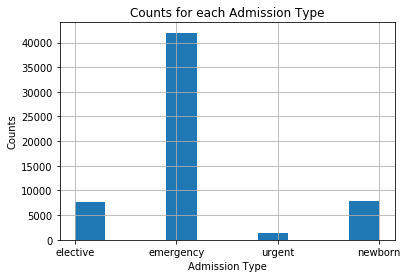

In [16]:
# histogram
df.Admission_Type.hist()
plt.title("Counts for each Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts on log scale')

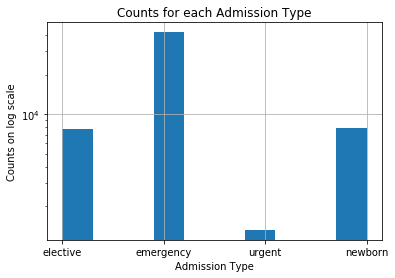

In [19]:
df.Admission_Type.hist(log=True)
plt.title("Counts for each Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Counts on log scale")

#most admission types are for emergencies

In [28]:
#compare the average length of admission
# between those who died versus those who did not die: visualization with labels and titles
df2 = df.groupby("Death_1").mean()
print(df2)

                   ID  AdmissionLengthDays  EnglishLanguage_1  Married_1
Death_1                                                                 
0        29484.310219            10.140012           0.576748   0.406765
1        29724.728811            10.129606           0.519651   0.446001


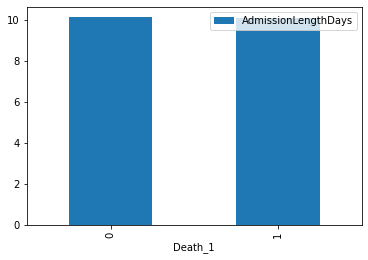

In [27]:
df2.plot.bar(y=["AdmissionLengthDays"])


In [34]:
#describe the asscoiation between death and insurance type
crosstable = pd.crosstab(df.Death_1, df.Insurance_Type)

In [35]:
chi = stats.chi2_contingency(crosstable)
print(chi)

(990.8535593949656, 3.425615316200906e-213, 4, array([[ 1603.93780473,  5206.26864074, 25357.70733738, 20293.73076466,
          549.35545249],
       [  177.06219527,   574.73135926,  2799.29266262,  2240.26923534,
           60.64454751]]))


In [36]:
#bar char for death and insurance type
df3 = df.groupby("Death_1").count()
print(df3)

            ID  AdmissionLengthDays  Admission_Type  Insurance_Type  \
Death_1                                                               
0        53011                53011           53011           53011   
1         5852                 5852            5852            5852   

         EnglishLanguage_1  Religion_Type  Married_1   Race     Dx  
Death_1                                                             
0                    53011          52653      53011  53011  53011  
1                     5852           5755       5852   5852   5852  
